# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [12]:
#Importar bibliotecas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier as tree_clas

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf_mat
from sklearn.metrics import ConfusionMatrixDisplay as conf_display

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs

In [13]:
#Importar base

data = pd.read_csv('credito_numerico.csv')

#Remover valores duplicados 

data.drop_duplicates()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,0,1,1,0,58.832877,3.106849,1,0,0,0,2.0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0
2,2,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0
3,3,0,1,1,0,46.224658,2.106849,1,1,1,1,2.0,0
4,4,1,1,0,0,29.230137,3.021918,1,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,0,1,0,54.109589,9.884932,1,0,0,0,2.0,1
16646,16646,1,0,1,0,43.389041,7.380822,1,1,1,0,2.0,1
16647,16647,0,1,1,0,30.005479,9.800000,1,1,0,0,2.0,1
16648,16648,0,1,1,0,30.005479,9.800000,1,1,0,0,2.0,1


In [14]:
#Análise de característica da base utilizada

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             16650 non-null  int64  
 1   sexo                   16650 non-null  int64  
 2   posse_de_veiculo       16650 non-null  int64  
 3   posse_de_imovel        16650 non-null  int64  
 4   qtd_filhos             16650 non-null  int64  
 5   idade                  16650 non-null  float64
 6   tempo_emprego          16650 non-null  float64
 7   possui_celular         16650 non-null  int64  
 8   possui_fone_comercial  16650 non-null  int64  
 9   possui_fone            16650 non-null  int64  
 10  possui_email           16650 non-null  int64  
 11  qt_pessoas_residencia  16650 non-null  float64
 12  mau                    16650 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.7 MB


É observado que não há valores vazios na base, uma vez que todas as colunas tem 16650 valores não nulos (o total de linhas na base). E nenhuma das colunas tem valor tipo object.

In [15]:
#Separar base de treino (70%) e teste (30%). Dois objetos, a variável resposta mau e as variáveis explicativas

#Definição dos dois objetos
x = data.drop('mau', axis = 1)
y = data.mau

#Definição das bases de teste e treino
x_test, x_train, y_test, y_train = tts(x, y,  test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

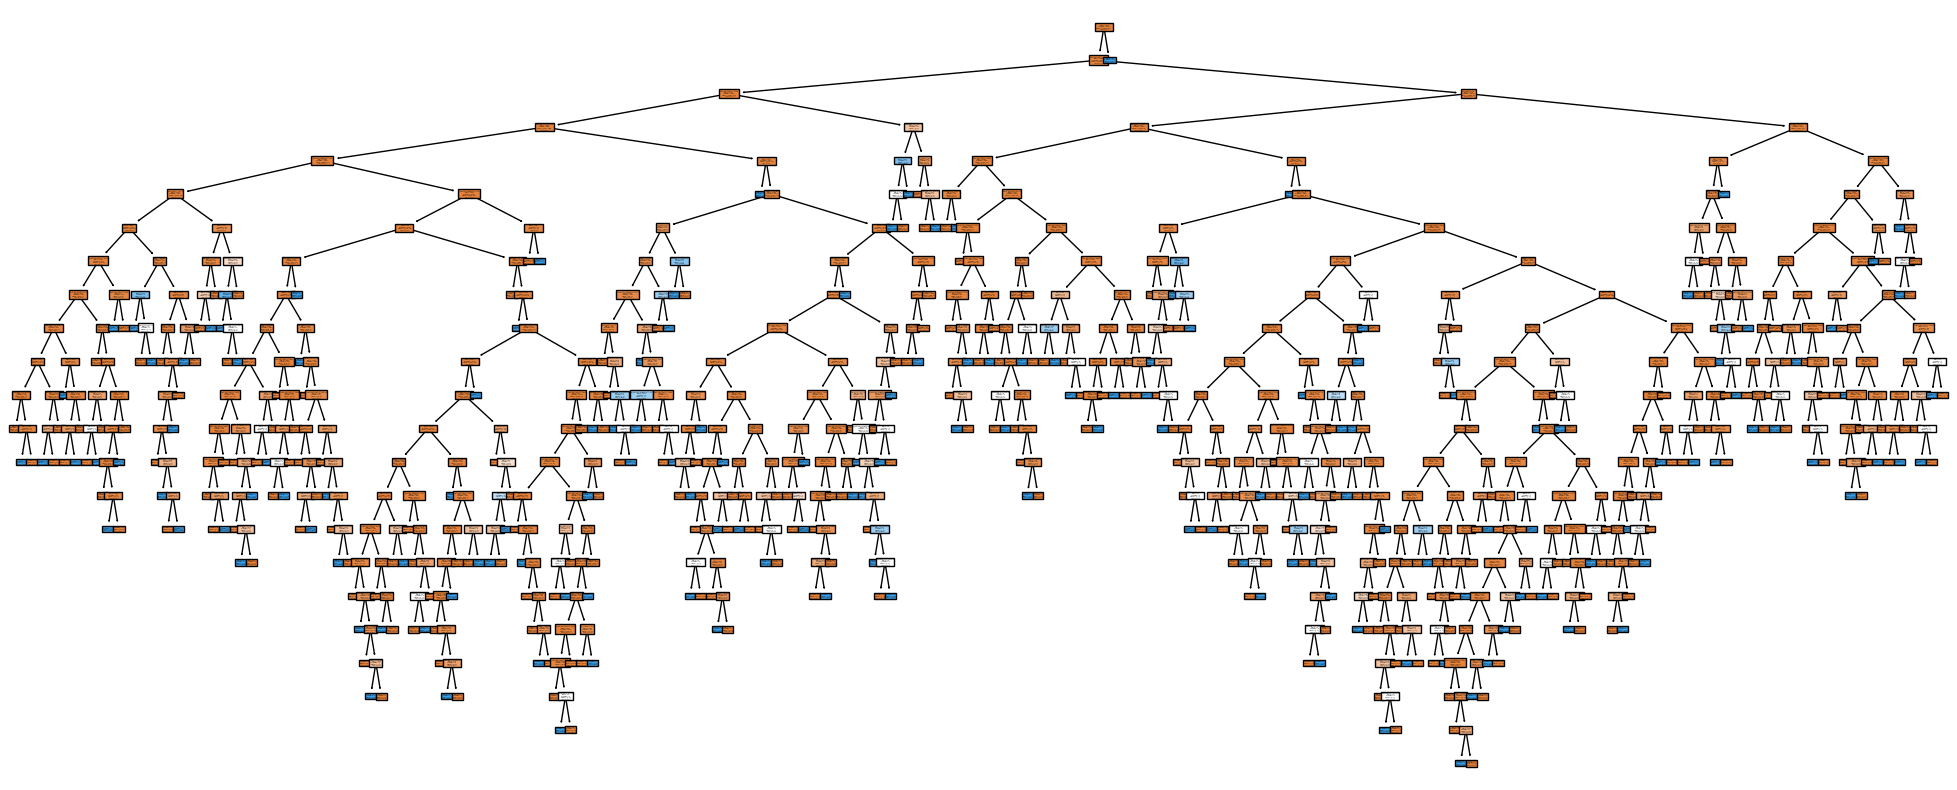

In [16]:
#Árvore de decisão inteira

clt = tree_clas(random_state= 100)

clt.fit(x, y)

plt.figure(figsize=(25, 10))
plot_tree(clt,
          filled=True,
          class_names=['true', 'false'],
          feature_names=list(x.columns));

In [17]:
#Treinar modelo

cltt = clt.fit(x_train,y_train)

y_pred_teste = cltt.predict(x_test)
y_pred_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

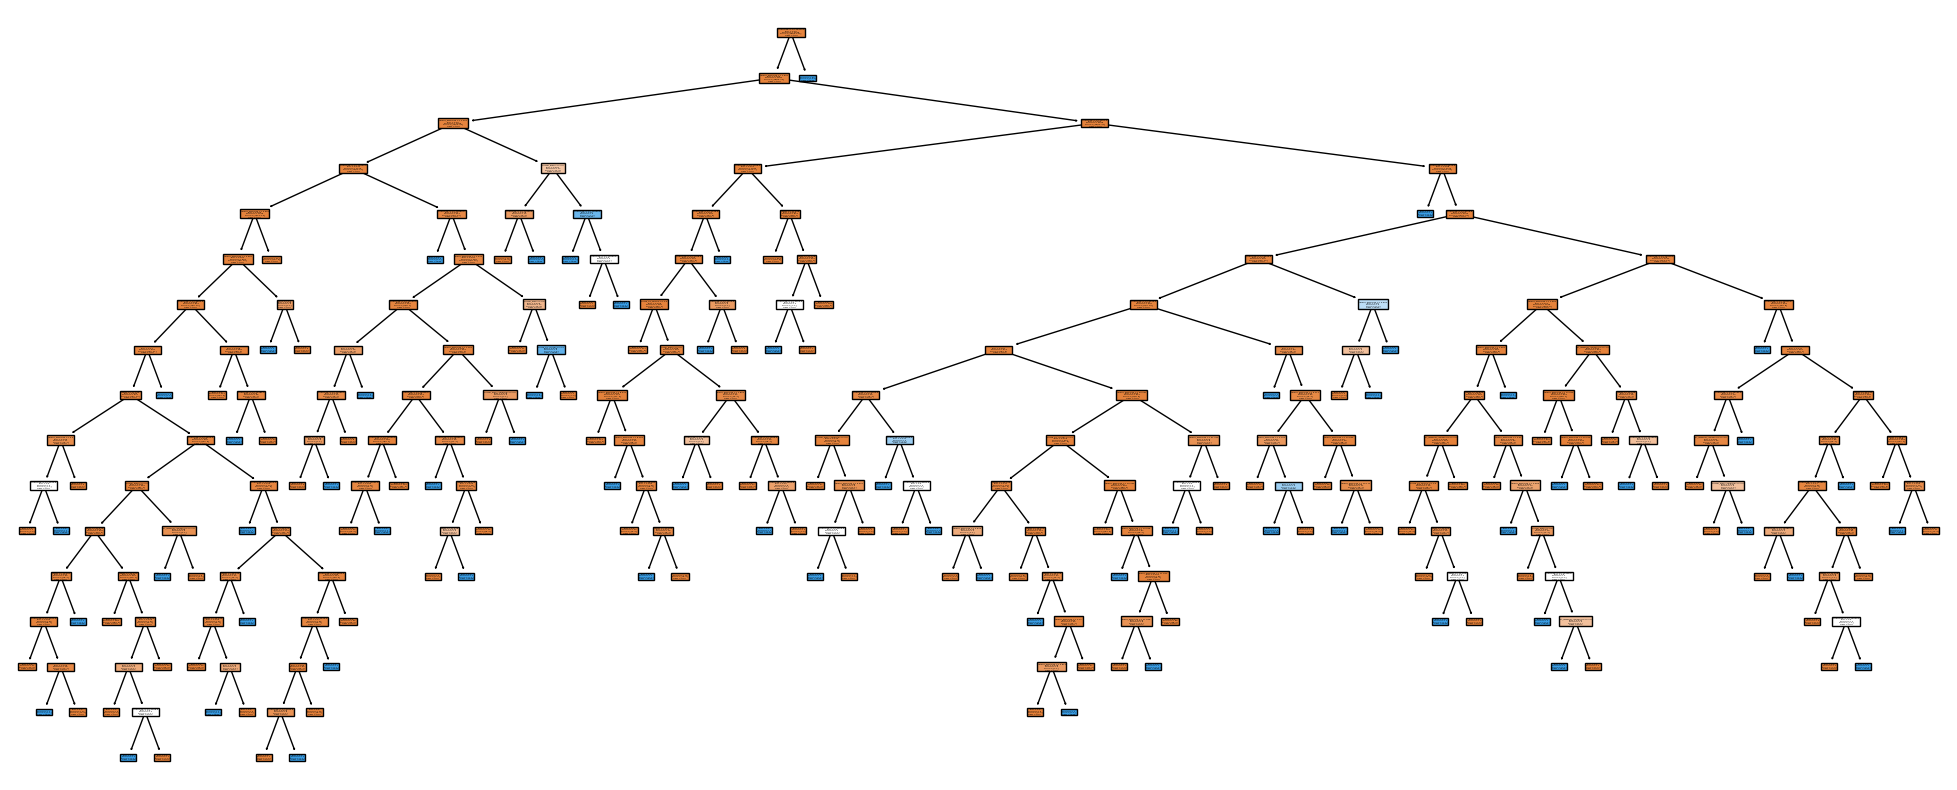

In [18]:
#Vizualizando a nova árvore

plt.figure(figsize=(25, 10))
plot_tree(cltt,
          filled=True,
          class_names=['true', 'false'],
          feature_names=list(x.columns));

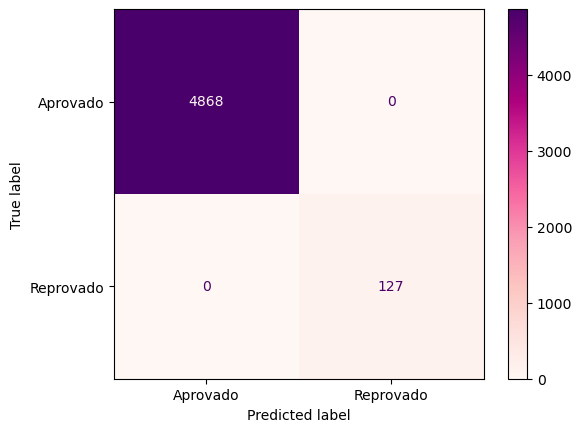

In [19]:
#Visualizar matriz de confusão

cm = conf_mat(y_train, cltt.predict(x_train), labels=cltt.classes_)

matriz = conf_display(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])

matriz.plot(cmap = 'RdPu');

In [20]:
#Acurácia

predict = cltt.predict(x_train)
acc(y_train, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

A modelo parece estar sofrendo overfitting

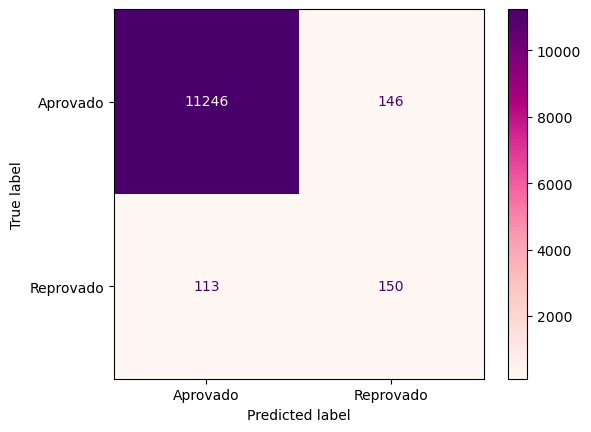

In [21]:
#Matriz de confusão para a base de teste

cmt = conf_mat(y_test, cltt.predict(x_test), labels=cltt.classes_)

matrizt = conf_display(confusion_matrix=cmt, display_labels=['Aprovado', 'Reprovado'])

matrizt.plot(cmap = 'RdPu');

In [22]:
#Acurácia

predict = cltt.predict(x_test)
round(acc(y_test, predict), 5)

0.97778

A acurácia em ambos os casos é muito alta, tendo pouca diferença no resultado obtido para o modelo com a base de treino e teste. 

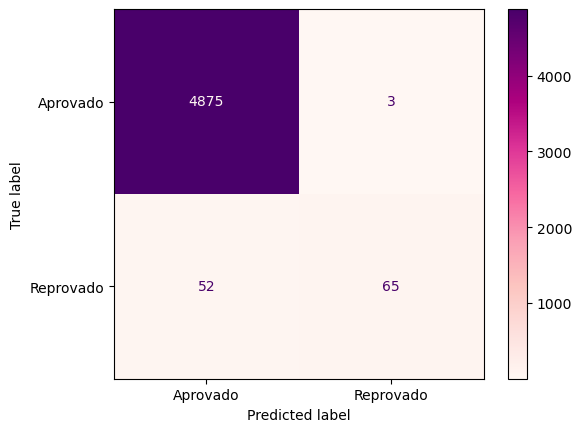

In [23]:
#Treinar uma nova árvore com observações por folha de 5 e de profundidade 10. Use o random_state = 123. 

#Definir nova base de treino e teste 

x_test, x_train, y_test, y_train = tts(x, y,  test_size = 0.3, random_state = 123)

cltn = tree_clas(max_depth=10, min_samples_leaf=5, random_state= 123)

clttn = cltn.fit(x_train,y_train)

y_pred_teste = clttn.predict(x_test)
y_pred_teste

clttn.fit(x, y)

#Visualizar matriz de confusão de treino

cmn = conf_mat(y_train, clttn.predict(x_train), labels=clttn.classes_)

matrizn = conf_display(confusion_matrix=cmn, display_labels=['Aprovado', 'Reprovado'])

matrizn.plot(cmap = 'RdPu');

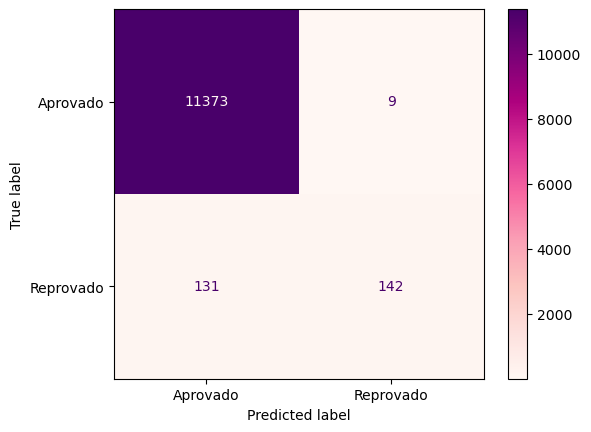

In [24]:
#Visualizar matriz de confusão de teste

cmn = conf_mat(y_test, clttn.predict(x_test), labels=clttn.classes_)

matrizn = conf_display(confusion_matrix=cmn, display_labels=['Aprovado', 'Reprovado'])

matrizn.plot(cmap = 'RdPu');

In [25]:
#Acurácia

predict = clttn.predict(x_train)
print("Acuária de treino: ",round(acc(y_train, predict), 5))

predict = clttn.predict(x_test)
print("Acuária de teste: ",round(acc(y_test, predict), 5))

Acuária de treino:  0.98899
Acuária de teste:  0.98799


O modelo continua parecendo estar pouco generalista uma vez que os resultados de teste e treino continuam muito alto, aproximadament, 0.99.

Suposição: Se classificarmos todos contratos como bons o resultado de acurácia opara qualquer base será 1, uma vez que o resultado não terá variação em relação a nenhuma outra coluna. 

In [26]:
#Classificando todos os contratos como bons

datan = data.copy(deep=True)

datan['mau'] = 0

#Definido as basese de teste e treino

#Definição dos dois objetos
x = datan.drop('mau', axis = 1)
y = datan.mau

#Definição das bases de teste e treino
x_test, x_train, y_test, y_train = tts(x, y,  test_size = 0.3, random_state = 123)

cltb = tree_clas(max_depth=10, min_samples_leaf=5, random_state= 123)

clttb = cltb.fit(x_train,y_train)

y_pred_teste = clttb.predict(x_test)
y_pred_teste

clttb.fit(x, y)

#Acurácia

predictb = clttb.predict(x_train)
print("Acuária de treino: ",acc(y_train, predictb))

predictbt = clttb.predict(x_test)
print("Acuária de teste: ",acc(y_test, predictbt))

Acuária de treino:  1.0
Acuária de teste:  1.0


A suposição anterior mostrou-se verdadeira. Dessa forma faz-se de interesse a observação da proporcionalidade de contratos bons e ruins na base de dados inicial. 

In [27]:
cont_maus = sum(data['mau'])/len(data)
cont_bons = (len(data) - sum(data['mau']))/len(data)

print(round(cont_maus*100, 2), '% dos contratos na base de dados são maus enquanto ', round(cont_bons*100, 2), '% dos contratos são bons. Assim, se pode\nconcluir que não há variação de dados suficiente para haver uma modelagem de dados mais genérica.') 

2.34 % dos contratos na base de dados são maus enquanto  97.66 % dos contratos são bons. Assim, se pode
concluir que não há variação de dados suficiente para haver uma modelagem de dados mais genérica.
